# Crop Yield Prediction

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions. The basic ingredients that sustain humans are similar. We eat a lot of corn, wheat, rice and other simple crops. In this project the prediction of top 10 most consumed yields all over the world is established by applying machine learning techniques. It consist of 10 most consumed crops. It is a regression problem

These corps include :

Cassava,
Maize,
Plantains and others,
Potatoes,
Rice, paddy,
Sorghum,
Soybeans,
Sweet potatoes,
Wheat,
Yams.

# Gathering & Cleaning Data

Crops Yield Data:

After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1961 to 2016 and yield value.

In [1]:
import pandas as pd                       # importing numpy and pandas library
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import boxcox
import math
#from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [4]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


.

We can rename Value to hg/ha_yield to make it easier to recognise that this is our crops yields production value.

In [6]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


.

We can remove the unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [7]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [8]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [9]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


Climate Data : Rainfall

The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.

Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [10]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


Checking the data types :

In [11]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


Convert average_rain_fall_mm_per_year from object to float

In [12]:
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [13]:
# Droping the null values
df_rain = df_rain.dropna()

In [14]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


Merge yield dataframe with rain dataframe by year and area columns 

In [15]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [16]:
yield_df.shape

(25385, 5)

In [17]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [18]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


Pesticides Data:

Pesticides used for each item and country 

In [19]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [20]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [21]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [22]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


Merging Pesticides dataframe with yield dataframe 

In [23]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [24]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


Average Temprature for each country

In [25]:
avg_temp=  pd.read_csv('temp.csv')
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [26]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


Average temprature starts from 1743 and ends at 2013, with some empty rows that we have to drop.

In [27]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [28]:
avg_temp.isnull().sum()

Year           0
Area           0
avg_temp    2547
dtype: int64

In [29]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [30]:
yield_df.shape

(28242, 7)

In [31]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [32]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

No null values!

# Data Exploration and Visualization

yield_df is the final dataframe

In [33]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [34]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [35]:
yield_df =yield_df.rename(index=str, columns={"pesticides_tonnes": "PTonnes"})
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,PTonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [36]:
yield_df =yield_df.rename(index=str, columns={"average_rain_fall_mm_per_year": "AvgRain"})
yield_df.head()

,Area,Item,Year,hg/ha_yield,AvgRain,PTonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Replacing the categorical variable with actual values

In [37]:
yield_df['Area'].nunique()

101

The dataframe has 101 Countries, representing 10 highest yield production.

In [38]:
yield_df['Item'].nunique()

10

In [39]:
yield_df = yield_df.rename(index=str, columns={"hg/ha_yield": "Value"})
yield_df.head()

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [40]:
yield_df.groupby(['Area'],sort=True)['Value'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: Value, dtype: int64

In [41]:
yield_df.groupby(['Item','Area'],sort=True)['Value'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: Value, dtype: int64

In [42]:
yield_df['Area'] = pd.factorize(yield_df['Area'])[0]
yield_df.head()

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,Maize,1990,36613,1485.0,121.0,16.37
1,0,Potatoes,1990,66667,1485.0,121.0,16.37
2,0,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,0,Sorghum,1990,12500,1485.0,121.0,16.37
4,0,Soybeans,1990,7000,1485.0,121.0,16.37


In [43]:
yield_df['Item'] = pd.factorize(yield_df['Item'])[0]
yield_df.head()

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,0,1990,36613,1485.0,121.0,16.37
1,0,1,1990,66667,1485.0,121.0,16.37
2,0,2,1990,23333,1485.0,121.0,16.37
3,0,3,1990,12500,1485.0,121.0,16.37
4,0,4,1990,7000,1485.0,121.0,16.37


# Univariate Analysis:

Text(0.5, 0, 'Value')

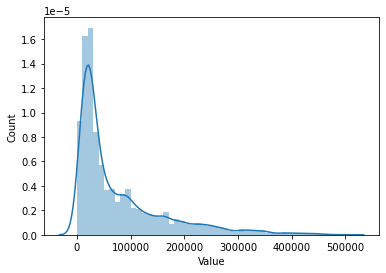

In [44]:
sns_plot = sns.distplot(yield_df["Value"])
plt.ylabel('Count')
plt.xlabel('Value')

# Bivariate Analysis:

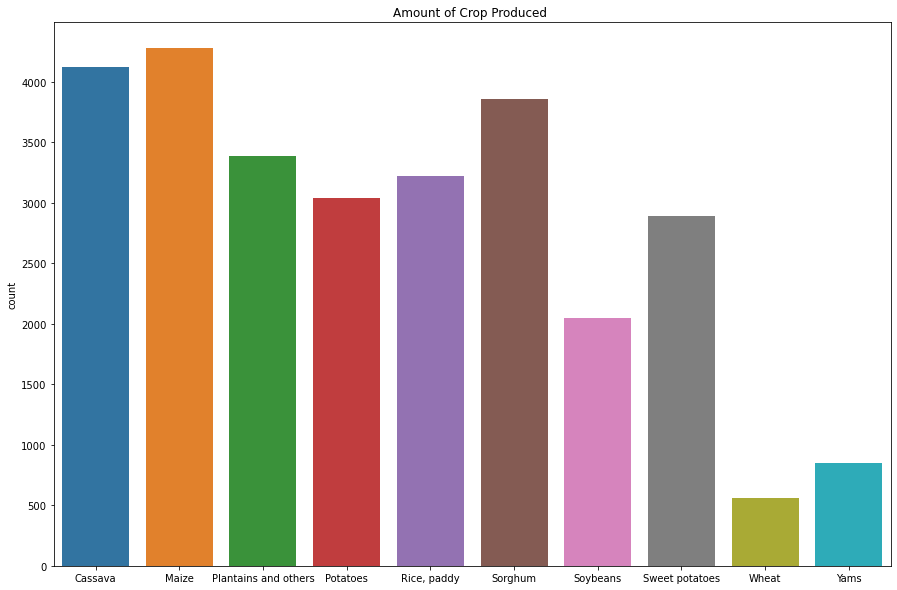

In [45]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.countplot(x = yield_df.Item.values, data=yield_df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Cassava'
labels[1] = 'Maize'
labels[2] = 'Plantains and others'
labels[3] = 'Potatoes'
labels[4] = 'Rice, paddy'
labels[5] = 'Sorghum'
labels[6] = 'Soybeans'
labels[7] = 'Sweet potatoes'
labels[8] = 'Wheat'
labels[9] = 'Yams'

ax.set_xticklabels(labels)
ax.set_title("Amount of Crop Produced ")
plt.show()

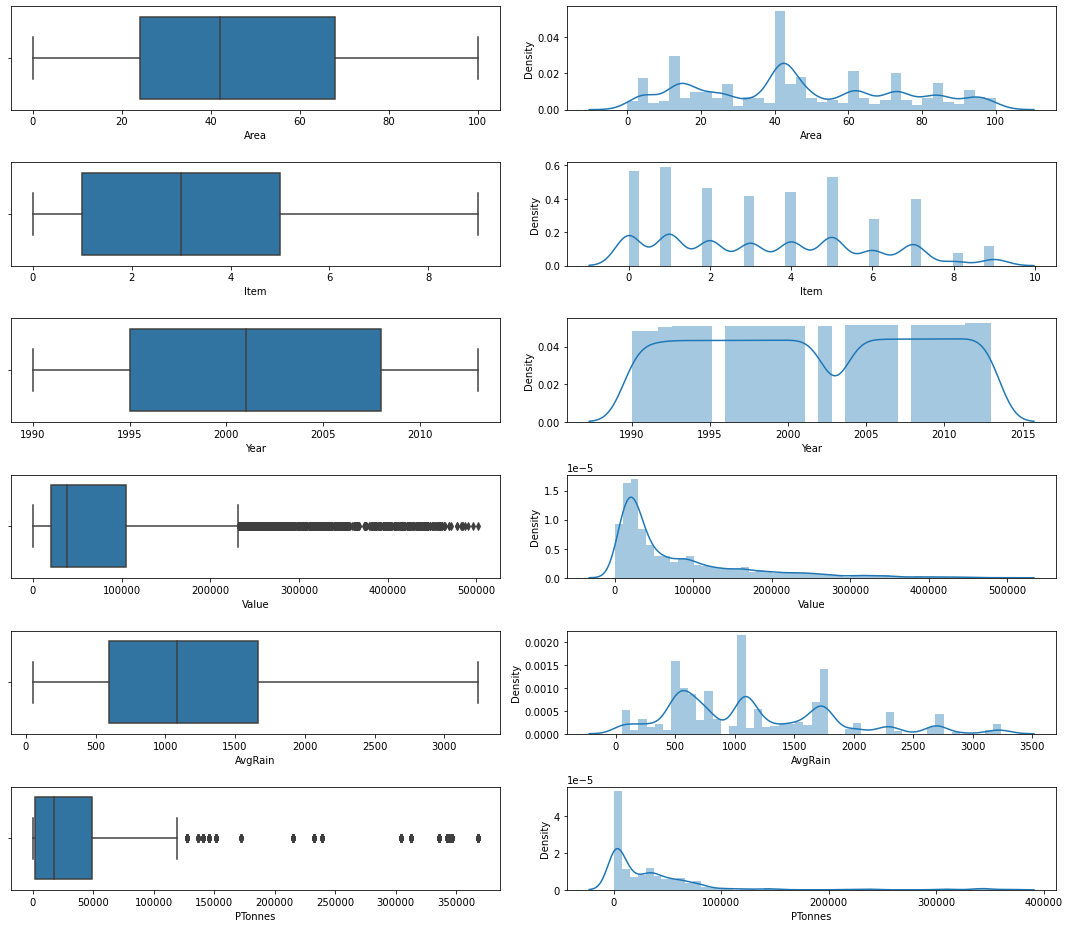

In [46]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= yield_df["Area"], ax = ax[0,0])
sns.distplot(yield_df['Area'], ax = ax[0,1])

sns.boxplot(x= yield_df["Item"], ax = ax[1,0])
sns.distplot(yield_df['Item'], ax = ax[1,1])

sns.boxplot(x= yield_df["Year"], ax = ax[2,0])
sns.distplot(yield_df['Year'], ax = ax[2,1])

sns.boxplot(x= yield_df["Value"], ax = ax[3,0])
sns.distplot(yield_df['Value'], ax = ax[3,1])

sns.boxplot(x= yield_df["AvgRain"], ax = ax[4,0])
sns.distplot(yield_df['AvgRain'], ax = ax[4,1])

sns.boxplot(x= yield_df["PTonnes"], ax = ax[5,0])
sns.distplot(yield_df['PTonnes'], ax = ax[5,1])

plt.tight_layout()

In [47]:
yield_df

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,0,1990,36613,1485.0,121.00,16.37
1,0,1,1990,66667,1485.0,121.00,16.37
2,0,2,1990,23333,1485.0,121.00,16.37
3,0,3,1990,12500,1485.0,121.00,16.37
4,0,4,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,2,2013,22581,657.0,2550.07,19.76
28238,100,3,2013,3066,657.0,2550.07,19.76
28239,100,4,2013,13142,657.0,2550.07,19.76
28240,100,7,2013,22222,657.0,2550.07,19.76


Finding the Boundary Values for 'Value' column

In [48]:
mn = yield_df['Value'].mean()
mn

77053.33209404434

In [49]:
st= yield_df['Value'].std()
st

84956.61289666739

In [50]:
Upper_limit = mn + 3*st
Lower_limit = mn - 3*st
Upper_limit

331923.1707840465

In [51]:
Lower_limit

-177816.50659595782

# Finding the Outliers

In [52]:
yield_df[(yield_df.Value>Upper_limit) | (yield_df.Value<Lower_limit)]

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
1300,5,7,2001,333333,534.0,32710.00,16.63
1301,5,7,2001,333333,534.0,32710.00,20.21
1302,5,7,2001,333333,534.0,32710.00,12.29
1303,5,7,2001,333333,534.0,32710.00,14.18
1304,5,7,2001,333333,534.0,32710.00,18.39
...,...,...,...,...,...,...,...
27703,97,1,2013,408993,1220.0,17673.46,8.76
27704,97,1,2013,408993,1220.0,17673.46,9.57
27705,97,1,2013,408993,1220.0,17673.46,9.57
27706,97,1,2013,408993,1220.0,17673.46,8.39


In [53]:
yield_df[(yield_df.Value<Upper_limit) & (yield_df.Value>Lower_limit)]

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,0,1990,36613,1485.0,121.00,16.37
1,0,1,1990,66667,1485.0,121.00,16.37
2,0,2,1990,23333,1485.0,121.00,16.37
3,0,3,1990,12500,1485.0,121.00,16.37
4,0,4,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,2,2013,22581,657.0,2550.07,19.76
28238,100,3,2013,3066,657.0,2550.07,19.76
28239,100,4,2013,13142,657.0,2550.07,19.76
28240,100,7,2013,22222,657.0,2550.07,19.76


# Removing Outliers

In [54]:
yield_df1 = yield_df[(yield_df.Value<Upper_limit) & (yield_df.Value>Lower_limit)]
yield_df1.shape

(27640, 7)

In [55]:
y1 = yield_df.shape[0] - yield_df1.shape[0]
y1

602

Finding the Boundary Values for 'PTonnes' column

In [56]:
mn = yield_df['PTonnes'].mean()
mn

37076.909343529136

In [57]:
st= yield_df['PTonnes'].std()
st

59958.78466505463

In [58]:
Upper_limit = mn + 3*st
Lower_limit = mn - 3*st
Upper_limit

216953.263338693

In [59]:
Lower_limit

-142799.44465163472

In [60]:
yield_df[(yield_df.PTonnes>Upper_limit) | (yield_df.PTonnes<Lower_limit)]

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
3928,14,6,2005,136059,1761.0,232232.0,22.05
3929,14,6,2005,136059,1761.0,232232.0,20.78
3930,14,6,2005,136059,1761.0,232232.0,18.53
3931,14,6,2005,136059,1761.0,232232.0,18.53
3932,14,6,2005,136059,1761.0,232232.0,28.17
...,...,...,...,...,...,...,...
4814,14,9,2013,96078,1761.0,367778.0,27.11
4815,14,9,2013,96078,1761.0,367778.0,17.84
4816,14,9,2013,96078,1761.0,367778.0,26.40
4817,14,9,2013,96078,1761.0,367778.0,25.19


In [61]:
yield_df[(yield_df.PTonnes<Upper_limit) & (yield_df.PTonnes>Lower_limit)]

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,0,1990,36613,1485.0,121.00,16.37
1,0,1,1990,66667,1485.0,121.00,16.37
2,0,2,1990,23333,1485.0,121.00,16.37
3,0,3,1990,12500,1485.0,121.00,16.37
4,0,4,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,2,2013,22581,657.0,2550.07,19.76
28238,100,3,2013,3066,657.0,2550.07,19.76
28239,100,4,2013,13142,657.0,2550.07,19.76
28240,100,7,2013,22222,657.0,2550.07,19.76


In [62]:
yield_df1 = yield_df[(yield_df.PTonnes<Upper_limit) & (yield_df.PTonnes>Lower_limit)]
yield_df1.shape

(27351, 7)

In [63]:
y1 = yield_df.shape[0] - yield_df1.shape[0]
y1

891

# Multi-Variate Analysis: 

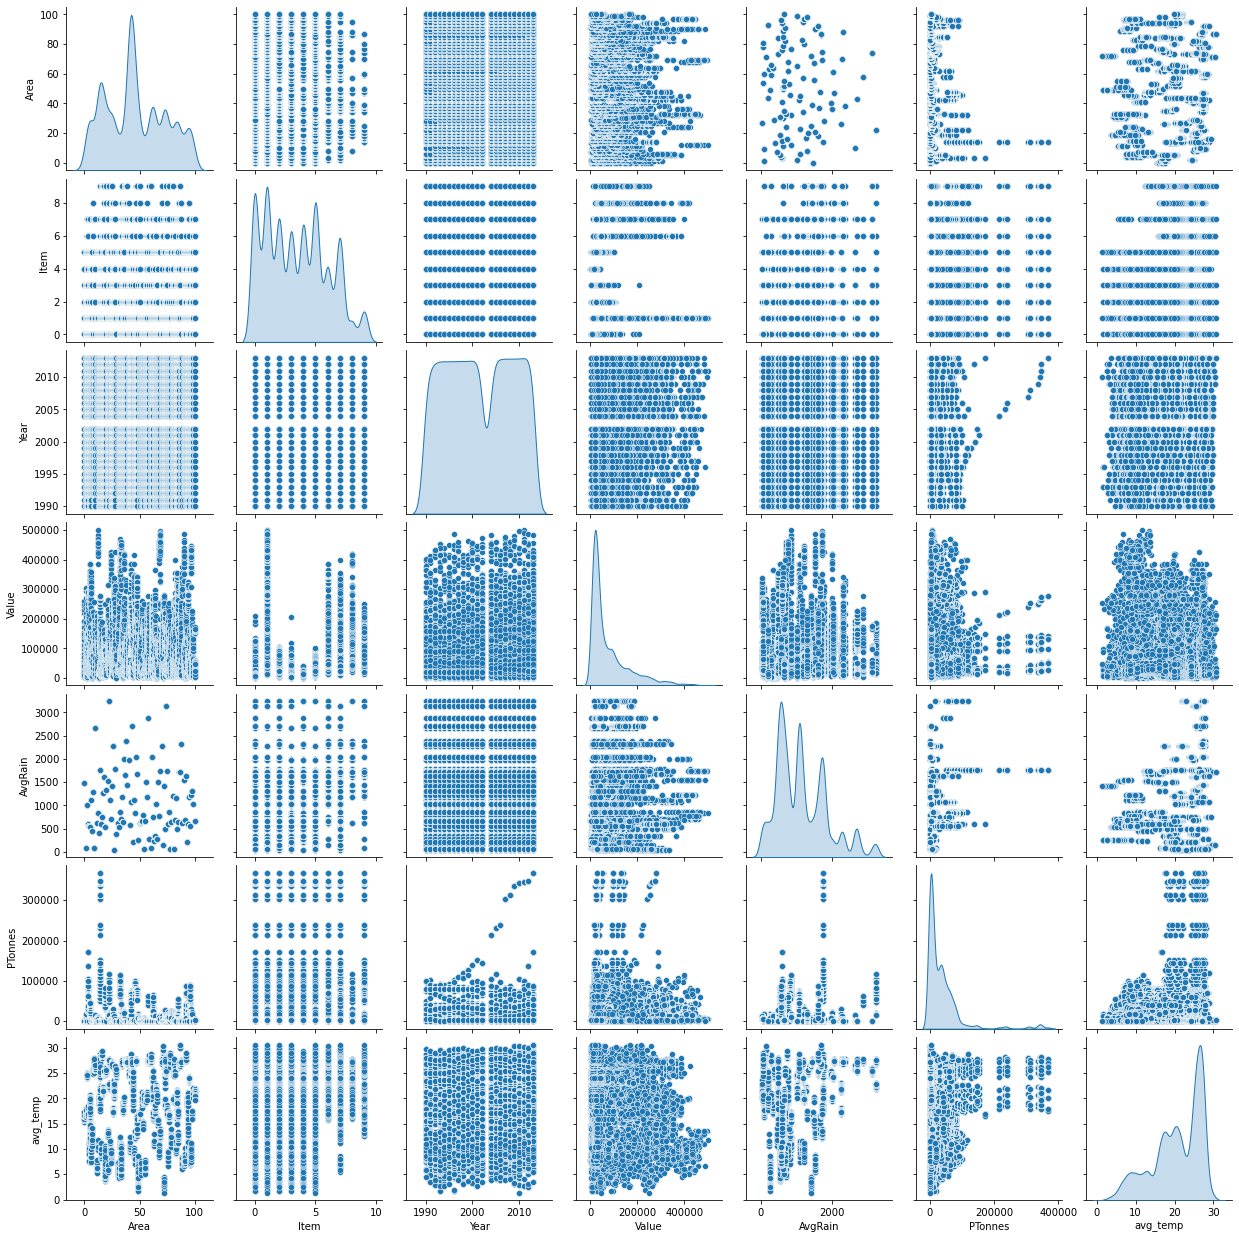

In [64]:
data_attr = yield_df.iloc[:, 0:7]
sns.pairplot(data_attr, diag_kind='kde') 

means more than two variables or features are analyzed together. that how they are related to each other.

Correlation – By Heatmap the relationship between the features.

Exploring the relationships between the colunms of the dataframe by visualizing the correlation matrix as a heatmap.

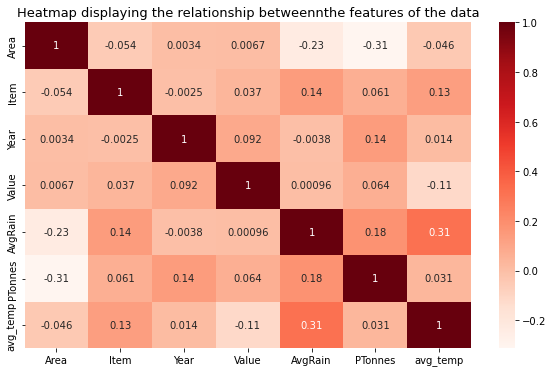

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(yield_df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

# Hypothesis Testing

In [66]:
yield_df.head()

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,0,1990,36613,1485.0,121.0,16.37
1,0,1,1990,66667,1485.0,121.0,16.37
2,0,2,1990,23333,1485.0,121.0,16.37
3,0,3,1990,12500,1485.0,121.0,16.37
4,0,4,1990,7000,1485.0,121.0,16.37


In [67]:
yield_df.columns

Index(['Area', 'Item', 'Year', 'Value', 'AvgRain', 'PTonnes', 'avg_temp'], dtype='object')

In [68]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      28242 non-null  int64  
 1   Item      28242 non-null  int64  
 2   Year      28242 non-null  int64  
 3   Value     28242 non-null  int64  
 4   AvgRain   28242 non-null  float64
 5   PTonnes   28242 non-null  float64
 6   avg_temp  28242 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.7+ MB


# T- Test

In [69]:
stats.ttest_1samp(a = yield_df.Area, popmean = 50)

Ttest_1sampResult(statistic=-21.969388098522852, pvalue=4.379701585105545e-106)

The p-value = 0 means that in all replicates we could not see a single value that is similar or higher than the observed correlation, which goes against our Null Hypothesis (Ho).

Therefore, it is possible to conclude that the correlation observed is not random and should be taken into consideration.

# Chi- Test

In [70]:
t = pd.crosstab(yield_df.Area, yield_df.Item, margins = True)
t

Item,0,1,2,3,4,5,6,7,8,9,All
Area,,,,,,,,,,,
0,23,23,4,3,23,23,0,0,0,0,99
1,23,23,23,22,0,23,0,0,0,0,114
2,23,23,23,13,13,23,23,23,0,0,164
3,46,46,46,46,46,46,46,46,0,0,368
4,21,21,0,0,0,21,0,0,0,0,63
...,...,...,...,...,...,...,...,...,...,...,...
97,0,115,0,0,0,115,0,0,0,0,230
98,23,23,23,23,23,23,0,23,0,0,161
99,23,23,23,23,23,23,23,23,0,0,184


In [71]:
stats.chi2_contingency(observed = t)

(13595.751925177836,
 0.0,
 1010,
 array([[1.44458254e+01, 1.49891651e+01, 1.18763544e+01, ...,
         1.94901211e+00, 2.96908859e+00, 9.90000000e+01],
        [1.66345868e+01, 1.72602507e+01, 1.36758020e+01, ...,
         2.24431697e+00, 3.41895050e+00, 1.14000000e+02],
        [2.39304582e+01, 2.48305361e+01, 1.96739608e+01, ...,
         3.22866653e+00, 4.91849019e+00, 1.64000000e+02],
        ...,
        [2.68488067e+01, 2.78586502e+01, 2.20732243e+01, ...,
         3.62240635e+00, 5.51830607e+00, 1.84000000e+02],
        [2.68488067e+01, 2.78586502e+01, 2.20732243e+01, ...,
         3.62240635e+00, 5.51830607e+00, 1.84000000e+02],
        [4.12100000e+03, 4.27600000e+03, 3.38800000e+03, ...,
         5.56000000e+02, 8.47000000e+02, 2.82420000e+04]]))

Based on the p value we can say there is a relationship between region and segment.

Is there any relationship between Value and pesticides_tonnes.
Correlation

H0 : There is no relationship

Ha : There is relationship



if p < 0.05 , then we reject NULL, There is relationship between Value and tonnes of pesticides used

else, we fail to reject NULL Hypothesis.


In [72]:
print(np.corrcoef(yield_df.Area, yield_df.Item))

[[ 1.         -0.05382344]
 [-0.05382344  1.        ]]


In [73]:
print(stats.stats.pearsonr(yield_df.Area, yield_df.Item))

(-0.05382344384171185, 1.411700328798423e-19)


Since pval is less than 0.05 we reject the NULL hypothesis. Hence, there is a relationship.

Correlation talks about the linear relationship between the variables. That means if one is changing the other is also changing.

# Data Preprocessing

In [74]:
yield_df.head()

,Area,Item,Year,Value,AvgRain,PTonnes,avg_temp
0,0,0,1990,36613,1485.0,121.0,16.37
1,0,1,1990,66667,1485.0,121.0,16.37
2,0,2,1990,23333,1485.0,121.0,16.37
3,0,3,1990,12500,1485.0,121.0,16.37
4,0,4,1990,7000,1485.0,121.0,16.37


In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Value']
label=yield_df['Value']
features.head()

,Year,AvgRain,PTonnes,avg_temp,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,...,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
features = features.drop(['Year'], axis=1)

In [78]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Columns: 114 entries, AvgRain to Item_9
dtypes: float64(3), uint8(111)
memory usage: 4.9+ MB


In [79]:
features.head()

,AvgRain,PTonnes,avg_temp,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,...,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [81]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Missing Values and Descriptive Statistics

In [82]:
# columns
all_cols = yield_df.columns.to_list()
num_cols = yield_df.dtypes[yield_df.dtypes != 'object'].index.to_list()
cat_cols = yield_df.dtypes[yield_df.dtypes == 'object'].index.to_list()
print(all_cols)
print(num_cols)
print("\n", cat_cols)

['Area', 'Item', 'Year', 'Value', 'AvgRain', 'PTonnes', 'avg_temp']
['Area', 'Item', 'Year', 'Value', 'AvgRain', 'PTonnes', 'avg_temp']

 []


In [83]:
yield_df.isna().sum()

Area        0
Item        0
Year        0
Value       0
AvgRain     0
PTonnes     0
avg_temp    0
dtype: int64

# Checking For Null Values

In [84]:
yield_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Area,28242.0,46.494724,26.813405,0.00,24.0000,42.00,68.00,100.00
Item,28242.0,3.431662,2.524667,0.00,1.0000,3.00,5.00,9.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
Value,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
AvgRain,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
PTonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


# To create separate plots to visualize the distribution of data

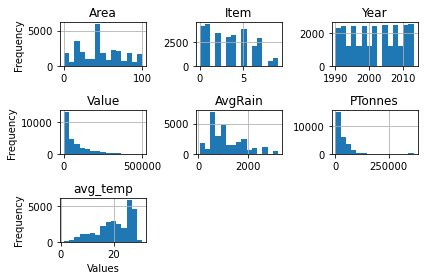

In [85]:
axList = yield_df.hist(bins=15)

for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Values')

    if ax.is_first_col():
        ax.set_ylabel('Frequency')
plt.tight_layout()

# Model Comparison & Selection

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

r2_score

In [87]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(X_train,y_train)
    y_pred=fit.predict(X_test)
    r2=r2_score(y_test,y_pred)
    return([model_name,r2])

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [LinearRegression(),
          RandomForestRegressor(n_estimators=100, random_state =0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [91]:
model_train=list(map(compare_models,models)) 

In [92]:
print(*model_train, sep = "\n")

['LinearRegression', 0.7539256880562069]
['RandomForestRegressor', 0.9735492960390427]
['SVR', -0.19543203867357395]
['DecisionTreeRegressor', 0.9597935448864001]


In [93]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [94]:
yield_df_onehot.head()

,Value,AvgRain,PTonnes,avg_temp,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,...,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


setting test data to columns from dataframe and excluding 'Value' values where ML model should be predicting 

In [95]:
#setting test data to columns from dataframe and excluding 'Value' values where ML model should be predicting 

test_df=pd.DataFrame(X_test,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Value'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [96]:
test_df.head()

,AvgRain,PTonnes,avg_temp,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,...,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,AvgRain,PTonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [98]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,AvgRain,PTonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,85,2
1,0.458451,0.000413,0.627257,56,5
2,0.183443,0.106159,0.518228,85,3
3,1.000000,0.224154,0.890971,22,1
4,0.458451,0.000355,0.625213,56,7


# Linear Regression

In [99]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.7539256880562069

# Random Tree

In [100]:
random = RandomForestRegressor(n_estimators=100, random_state =0)
random.fit(X_train, y_train)
random.score(X_test, y_test)

0.9735492960390427

# Gradient Boosting Regressor

In [101]:
from sklearn import ensemble
gbr =ensemble.GradientBoostingRegressor(n_estimators =400, max_depth =5)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.9609087623721118

# Decission Tree

In [102]:
from sklearn import tree

reg_decision_model=DecisionTreeRegressor()

In [103]:
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [104]:
reg_decision_model.score(X_train,y_train)

0.9997366344809914

In [105]:
reg_decision_model.score(X_test,y_test)

0.9593108684575046

# Decision Tree Model Evaluation and Prediction

In [106]:
prediction=reg_decision_model.predict(X_test)

<AxesSubplot:xlabel='Value', ylabel='Density'>

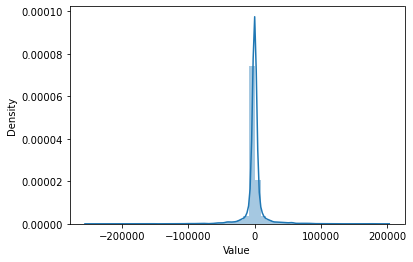

In [107]:
# checking difference between labled y and predicted y
sns.distplot(y_test-prediction)

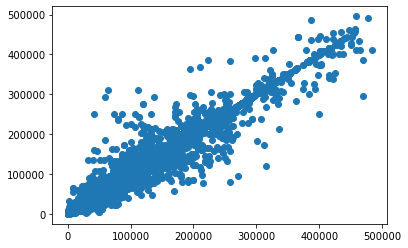

In [108]:
plt.scatter(y_test,prediction)

# Hyper Parameter tuning

In [104]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [105]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [106]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [107]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [109]:
X=features

In [110]:
y=label

In [ ]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [112]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

# Hyperparameters of Decision Trees with Visualizations

[Text(957.8982770829168, 537.4227272727273, 'X[105] <= 0.5\nmse = 7133770906.35\nsamples = 19769\nvalue = 76864.978'),
 Text(865.950402086246, 525.0681818181819, 'X[110] <= 0.5\nmse = 3829478717.581\nsamples = 16801\nvalue = 55444.363'),
 Text(770.744176924884, 512.7136363636364, 'X[111] <= 0.5\nmse = 2483509544.561\nsamples = 15381\nvalue = 46500.324'),
 Text(664.3387276812816, 500.3590909090909, 'X[113] <= 0.5\nmse = 1177525214.614\nsamples = 13359\nvalue = 35444.943'),
 Text(545.4303302410456, 488.00454545454545, 'X[112] <= 0.5\nmse = 786280729.362\nsamples = 12749\nvalue = 31692.855'),
 Text(338.82184049403025, 475.65000000000003, 'X[2] <= 0.442\nmse = 465477130.207\nsamples = 12357\nvalue = 29325.226'),
 Text(145.36943207632825, 463.29545454545456, 'X[104] <= 0.5\nmse = 704051949.447\nsamples = 2600\nvalue = 44887.229'),
 Text(103.59300489229004, 450.9409090909091, 'X[0] <= 0.202\nmse = 476210060.144\nsamples = 1943\nvalue = 37588.745'),
 Text(67.56689385652244, 438.58636363636367

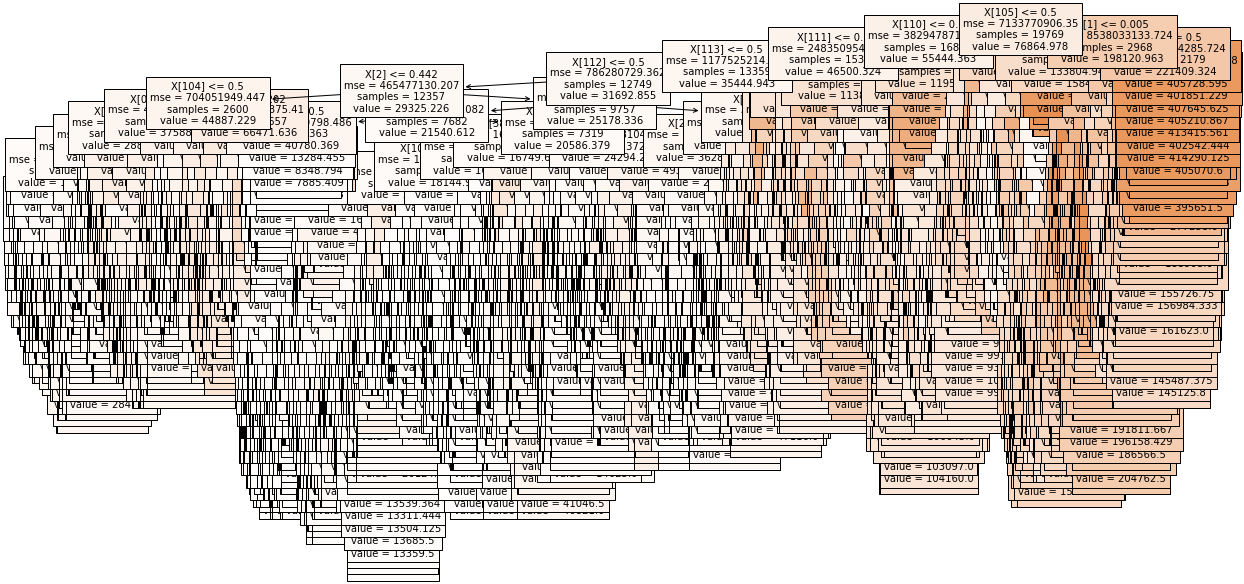

In [214]:
plt.figure(figsize=(20,10))
tree.plot_tree(reg_decission_model, filled=True, fontsize=10)

[Text(862.0477059276692, 537.4227272727273, 'X[105] <= 0.5\nmse = 7133770906.35\nsamples = 19769\nvalue = 76864.978'),
 Text(779.1217322377747, 525.0681818181819, 'X[110] <= 0.5\nmse = 3829478717.581\nsamples = 16801\nvalue = 55444.363'),
 Text(694.3629005762883, 512.7136363636364, 'X[111] <= 0.5\nmse = 2483509544.561\nsamples = 15381\nvalue = 46500.324'),
 Text(600.0284207413374, 500.3590909090909, 'X[113] <= 0.5\nmse = 1177525214.614\nsamples = 13359\nvalue = 35444.943'),
 Text(493.29856248263246, 488.00454545454545, 'X[112] <= 0.5\nmse = 786280729.362\nsamples = 12749\nvalue = 31692.855'),
 Text(307.7350491157608, 475.65000000000003, 'X[2] <= 0.442\nmse = 465477130.207\nsamples = 12357\nvalue = 29325.226'),
 Text(134.1699305102151, 463.29545454545456, 'X[104] <= 0.5\nmse = 704051949.447\nsamples = 2600\nvalue = 44887.229'),
 Text(95.71345077651094, 450.9409090909091, 'X[0] <= 0.202\nmse = 476210060.144\nsamples = 1943\nvalue = 37588.745'),
 Text(62.779532882062064, 438.5863636363636

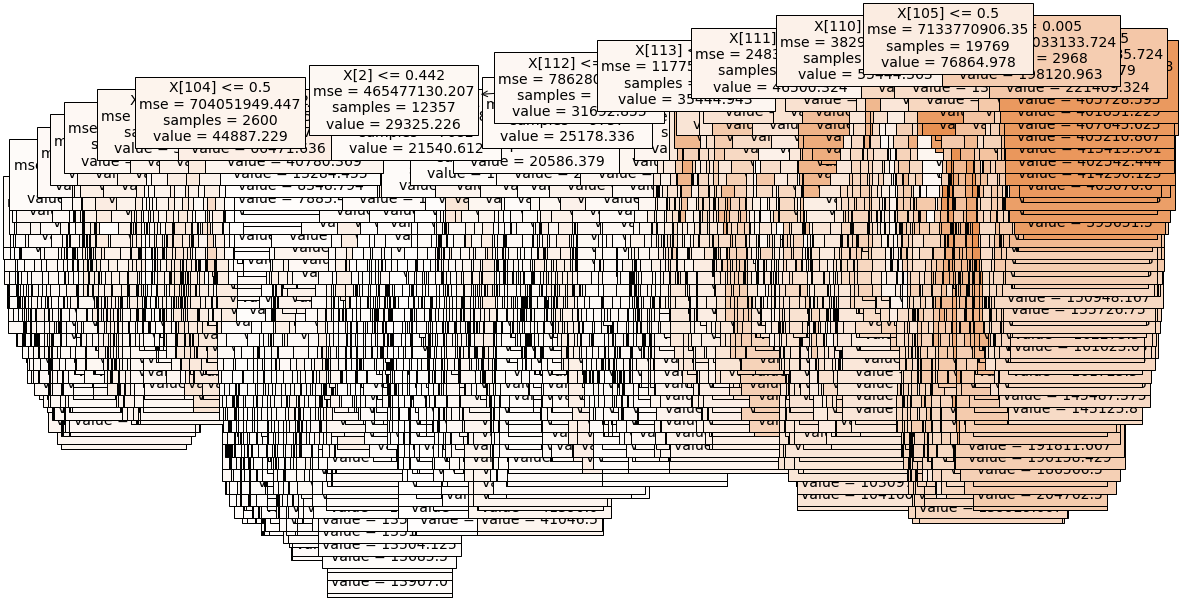

In [216]:
reg_decission_model = tree.DecisionTreeRegressor(min_impurity_decrease=0.2)
reg_decission_model.fit(X_train, y_train)
plt.figure(figsize=(18,10))
tree.plot_tree(reg_decission_model, filled=True, fontsize=14)

[Text(558.0, 475.65000000000003, 'X[105] <= 0.5\nmse = 7133770906.35\nsamples = 19769\nvalue = 76864.978'),
 Text(279.0, 339.75, 'X[110] <= 0.5\nmse = 3829478717.581\nsamples = 16801\nvalue = 55444.363'),
 Text(139.5, 203.85000000000002, 'X[111] <= 0.5\nmse = 2483509544.561\nsamples = 15381\nvalue = 46500.324'),
 Text(69.75, 67.94999999999999, 'mse = 1177525214.614\nsamples = 13359\nvalue = 35444.943'),
 Text(209.25, 67.94999999999999, 'mse = 4969440620.299\nsamples = 2022\nvalue = 119541.292'),
 Text(418.5, 203.85000000000002, 'X[45] <= 0.5\nmse = 8156559311.196\nsamples = 1420\nvalue = 152323.413'),
 Text(348.75, 67.94999999999999, 'mse = 2138166321.106\nsamples = 1061\nvalue = 107728.791'),
 Text(488.25, 67.94999999999999, 'mse = 2695818457.215\nsamples = 359\nvalue = 284119.777'),
 Text(837.0, 339.75, 'X[1] <= 0.005\nmse = 8538033133.724\nsamples = 2968\nvalue = 198120.963'),
 Text(697.5, 203.85000000000002, 'X[1] <= 0.001\nmse = 4043069312.641\nsamples = 789\nvalue = 133804.944'),

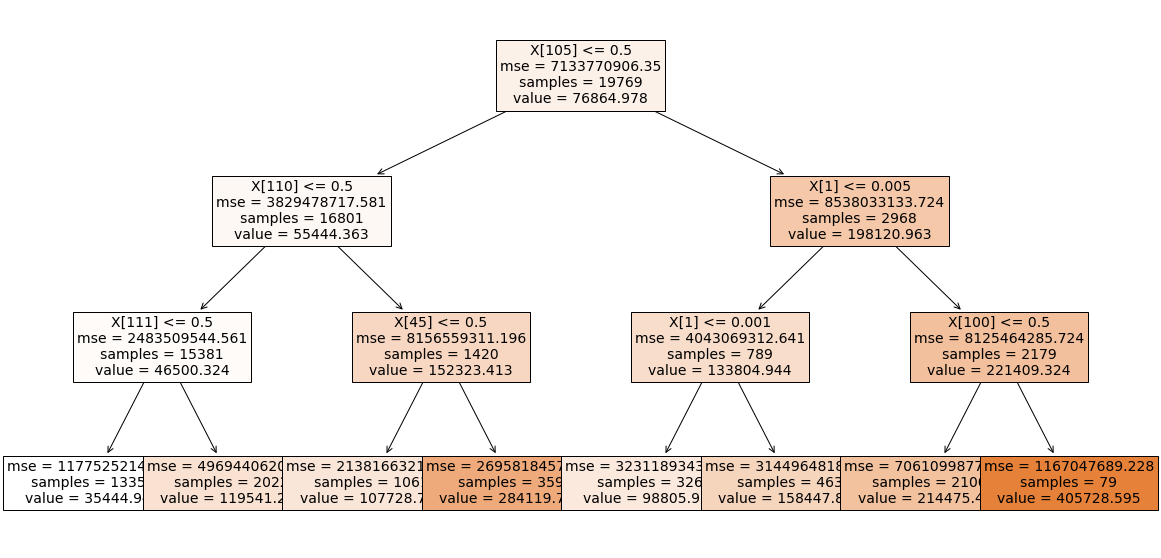

In [217]:
reg_decission_model = tree.DecisionTreeRegressor(max_depth=3)
reg_decission_model.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(reg_decission_model, filled=True, fontsize=14)

[Text(558.0, 475.65000000000003, 'X[105] <= 0.5\nmse = 7133770906.35\nsamples = 19769\nvalue = 76864.978'),
 Text(279.0, 339.75, 'X[110] <= 0.5\nmse = 3829478717.581\nsamples = 16801\nvalue = 55444.363'),
 Text(139.5, 203.85000000000002, 'X[111] <= 0.5\nmse = 2483509544.561\nsamples = 15381\nvalue = 46500.324'),
 Text(69.75, 67.94999999999999, 'mse = 1177525214.614\nsamples = 13359\nvalue = 35444.943'),
 Text(209.25, 67.94999999999999, 'mse = 4969440620.299\nsamples = 2022\nvalue = 119541.292'),
 Text(418.5, 203.85000000000002, 'X[45] <= 0.5\nmse = 8156559311.196\nsamples = 1420\nvalue = 152323.413'),
 Text(348.75, 67.94999999999999, 'mse = 2138166321.106\nsamples = 1061\nvalue = 107728.791'),
 Text(488.25, 67.94999999999999, 'mse = 2695818457.215\nsamples = 359\nvalue = 284119.777'),
 Text(837.0, 339.75, 'X[1] <= 0.005\nmse = 8538033133.724\nsamples = 2968\nvalue = 198120.963'),
 Text(697.5, 203.85000000000002, 'X[1] <= 0.001\nmse = 4043069312.641\nsamples = 789\nvalue = 133804.944'),

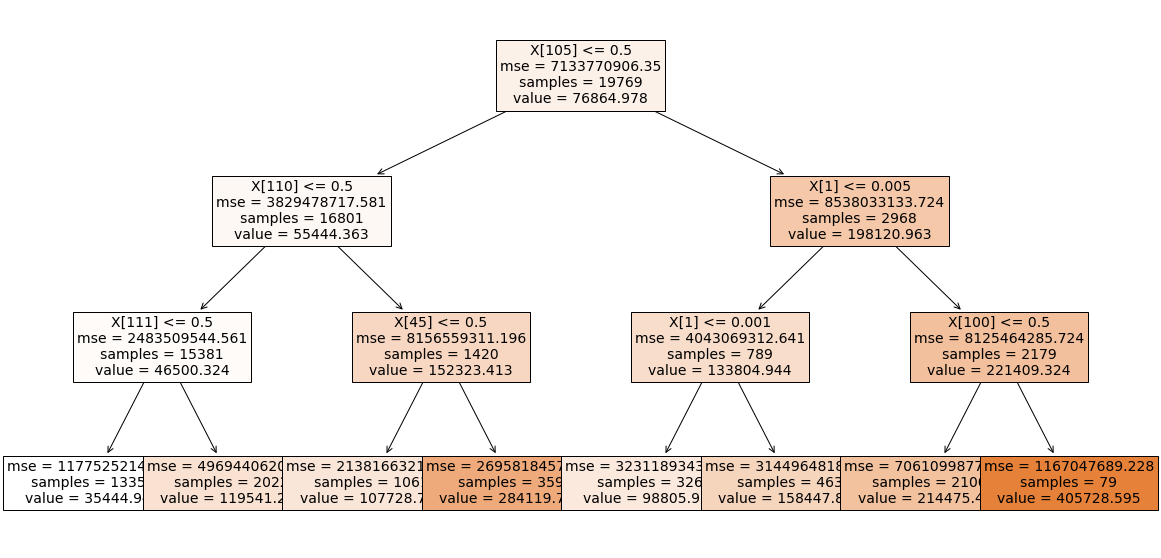

In [218]:
reg_decission_model = tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=3)
reg_decission_model.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(reg_decission_model, filled=True, fontsize=14)

[Text(697.5, 475.65000000000003, 'X[105] <= 0.5\nmse = 7133770906.35\nsamples = 19769\nvalue = 76864.978'),
 Text(558.0, 339.75, 'X[110] <= 0.5\nmse = 3829478717.581\nsamples = 16801\nvalue = 55444.363'),
 Text(279.0, 203.85000000000002, 'X[111] <= 0.5\nmse = 2483509544.561\nsamples = 15381\nvalue = 46500.324'),
 Text(139.5, 67.94999999999999, 'mse = 1177525214.614\nsamples = 13359\nvalue = 35444.943'),
 Text(418.5, 67.94999999999999, 'mse = 4969440620.299\nsamples = 2022\nvalue = 119541.292'),
 Text(837.0, 203.85000000000002, 'X[45] <= 0.5\nmse = 8156559311.196\nsamples = 1420\nvalue = 152323.413'),
 Text(697.5, 67.94999999999999, 'mse = 2138166321.106\nsamples = 1061\nvalue = 107728.791'),
 Text(976.5, 67.94999999999999, 'mse = 2695818457.215\nsamples = 359\nvalue = 284119.777'),
 Text(837.0, 339.75, 'mse = 8538033133.724\nsamples = 2968\nvalue = 198120.963')]

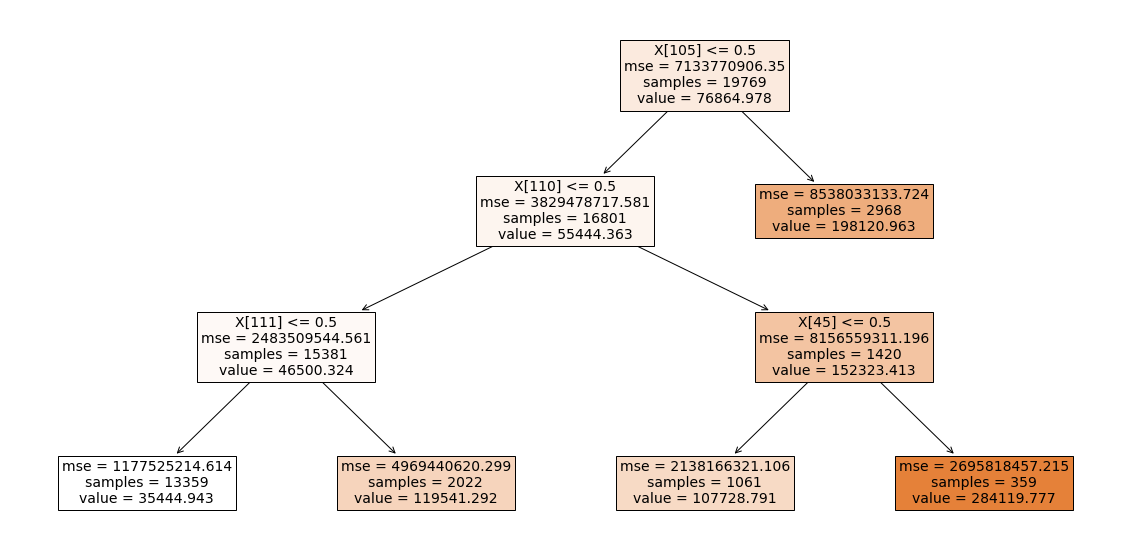

In [220]:
reg_decission_model = tree.DecisionTreeRegressor(max_leaf_nodes=5)
reg_decission_model.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(reg_decission_model, filled=True, fontsize=14)

In [109]:
reg_decission_model=DecisionTreeRegressor()
model=reg_decission_model.fit(X_train,y_train)

test_df["yield_predicted"]= model.predict(X_test)
test_df["yield_actual"]=pd.DataFrame(y_test)["Value"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
0    0.889921
1    0.910544
2    0.895713
3    0.801578
4    0.855390
5    0.923971
6    0.928056
7    0.847439
8    0.776018
9    0.929439
dtype: float64

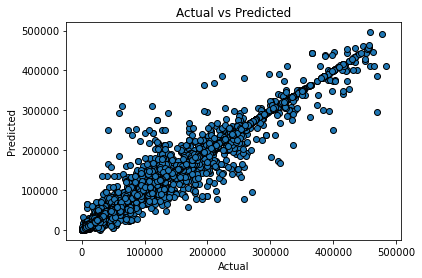

In [110]:
fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [111]:
def adjusted_r_squared(y,y_pred,x):
    score=1- (((1-(r2_score(y,y_pred)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
0    0.889209
1    0.909993
2    0.894846
3    0.799800
4    0.854217
5    0.923440
6    0.927121
7    0.846018
8    0.764458
9    0.926963
dtype: float64

# Model Results

In [112]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="Value"]}

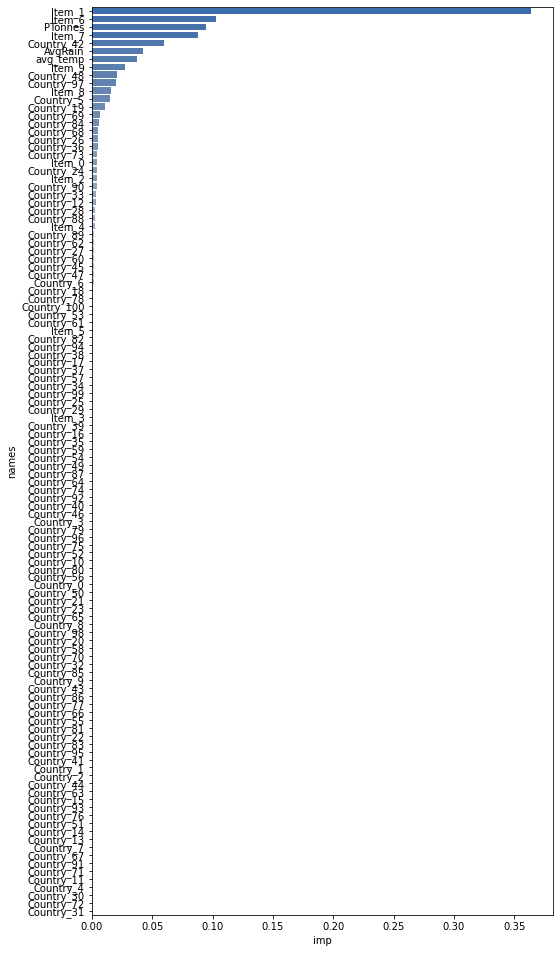

In [113]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

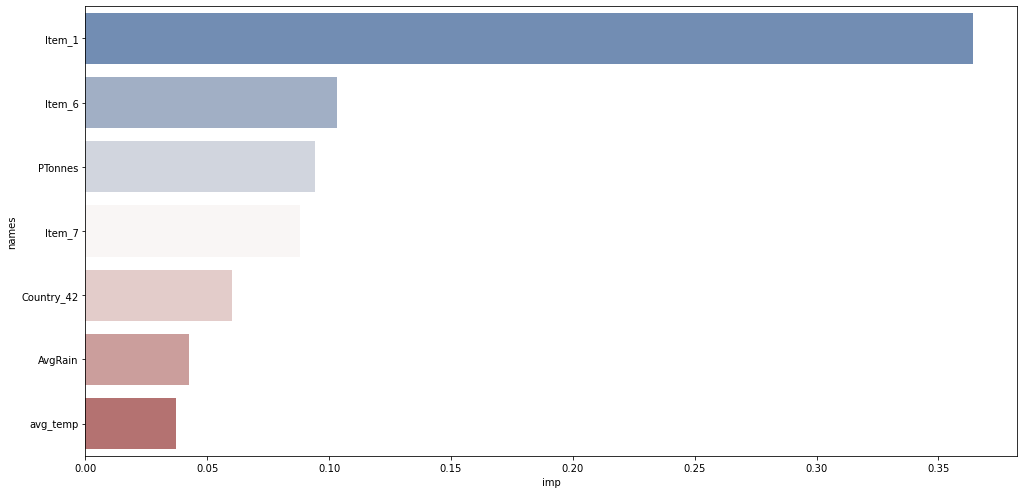

In [114]:
#7 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

# Conclusion

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava too, then as expected we see the effect of pesticides, where its the third most important feature, and then if the crop is sweet potatoes, we see some of the highest crops in features importance in dataset.

If the crop is grown in India, makes sense since Indis has the largest crops sum in the dataset. Then comes rainfall and temprature. Thr first assumption about these features were correct, where they all significanally impact the expected crops yield in the model.